# 분류

## 1) 데이터 셋 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\samsung\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_path = 'data/'
mushrooms = pd.read_csv(data_path + 'mushrooms.csv')
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## 2) 데이터 탐색

In [3]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
for i in mushrooms.columns:
    print(i,' :',mushrooms[i].unique())

class  : ['p' 'e']
cap-shape  : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface  : ['s' 'y' 'f' 'g']
cap-color  : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises  : ['t' 'f']
odor  : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment  : ['f' 'a']
gill-spacing  : ['c' 'w']
gill-size  : ['n' 'b']
gill-color  : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape  : ['e' 't']
stalk-root  : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring  : ['s' 'f' 'k' 'y']
stalk-surface-below-ring  : ['s' 'f' 'y' 'k']
stalk-color-above-ring  : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring  : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type  : ['p']
veil-color  : ['w' 'n' 'o' 'y']
ring-number  : ['o' 't' 'n']
ring-type  : ['p' 'e' 'l' 'f' 'n']
spore-print-color  : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population  : ['s' 'n' 'a' 'v' 'y' 'c']
habitat  : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


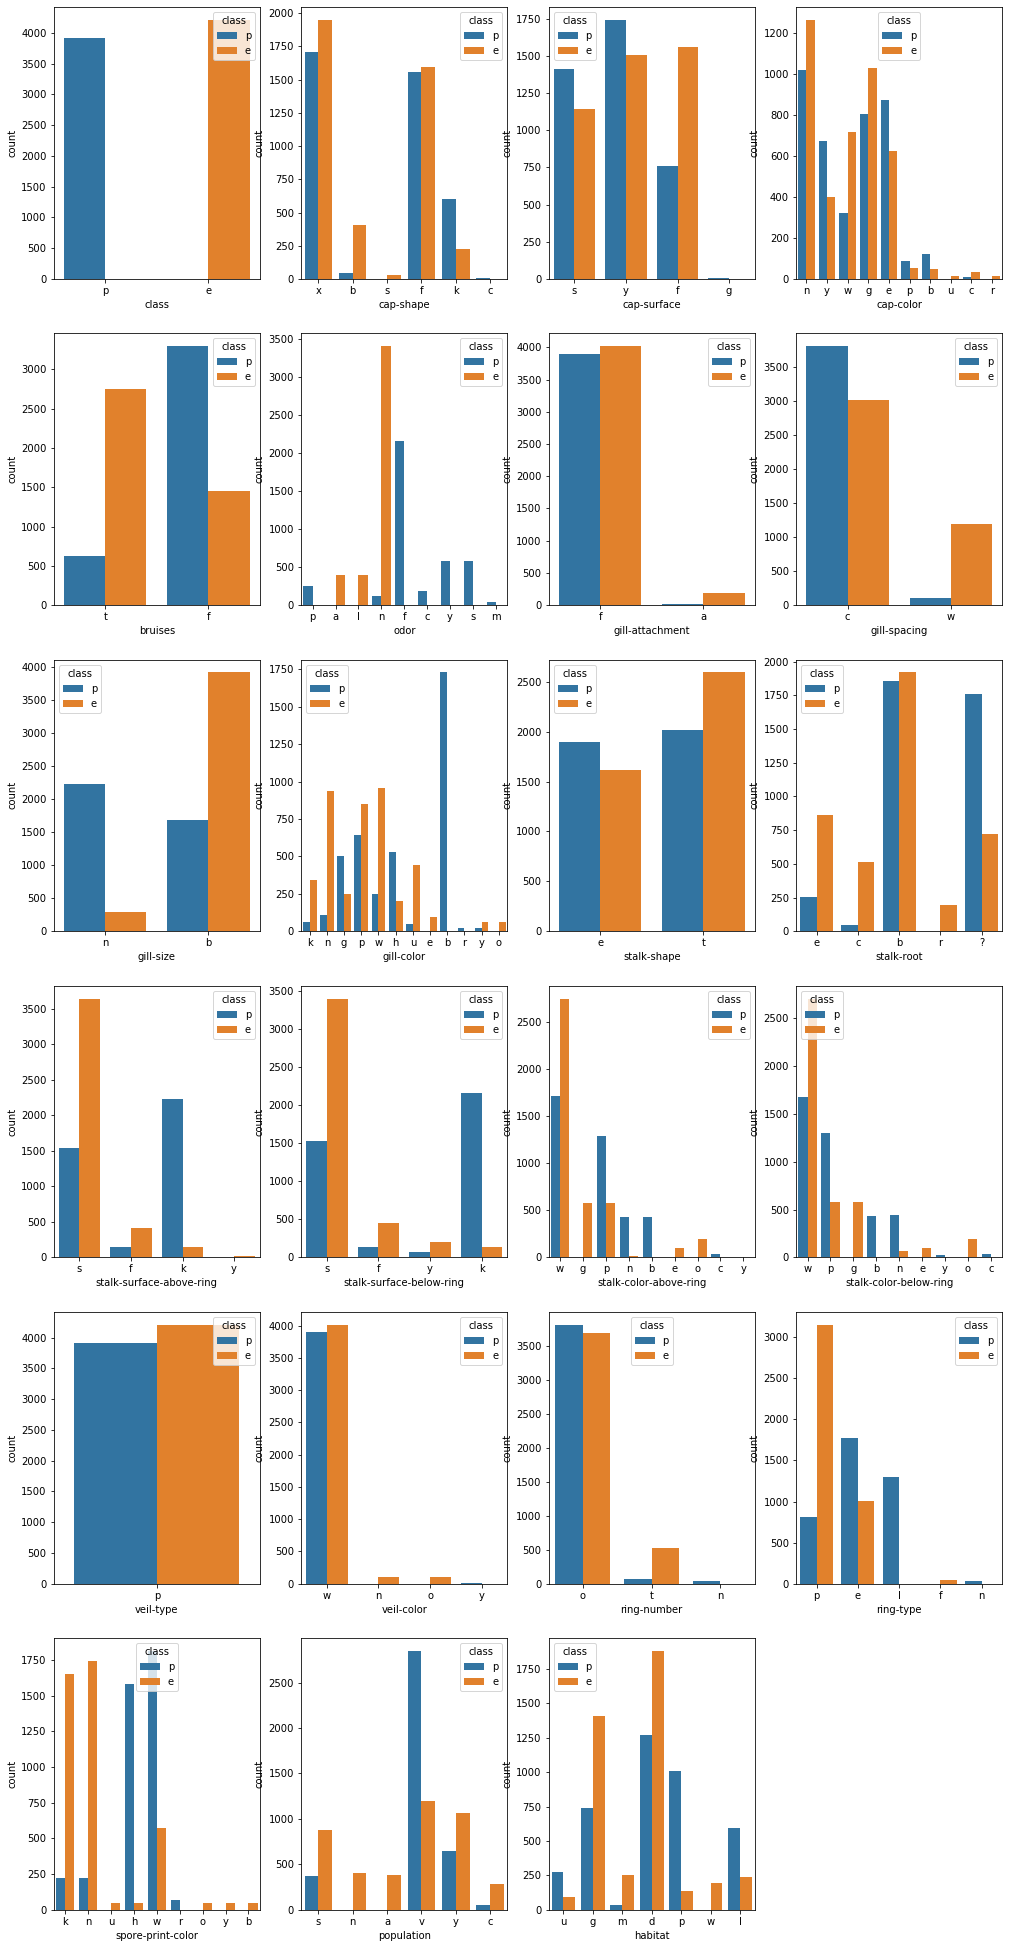

In [20]:
plt.figure(figsize=(17,35))
m=1
for i,col in enumerate(mushrooms.columns):
    plt.subplot(6, 4, m)
    sns.countplot(x=col, hue="class", data=mushrooms)
    m=m+1

## 3) 데이터 전처리

In [13]:
data = mushrooms.drop('veil-type',axis=1)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in data.columns:
    data[i] = le.fit_transform(data[i])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [15]:
X = data.drop('class',axis=1)
Y = data['class']

In [17]:
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X, Y)

tmp = [round(((score/sum(fs.scores_))*100),2) for score in fs.scores_]

features_data = pd.DataFrame({'Feature':X.columns,'Scores':fs.scores_,'Importance (%)':tmp}).sort_values(by=['Scores'],ascending=False)
features_data

,Feature,Scores,Importance (%)
8,gill-color,5957.764469,39.08
17,ring-type,1950.610146,12.80
7,gill-size,1636.606833,10.74
3,bruises,1194.277352,7.83
10,stalk-root,1186.029221,7.78
6,gill-spacing,826.795274,5.42
20,habitat,751.309489,4.93
18,spore-print-color,379.132729,2.49
19,population,311.766736,2.05
11,stalk-surface-above-ring,222.982400,1.46


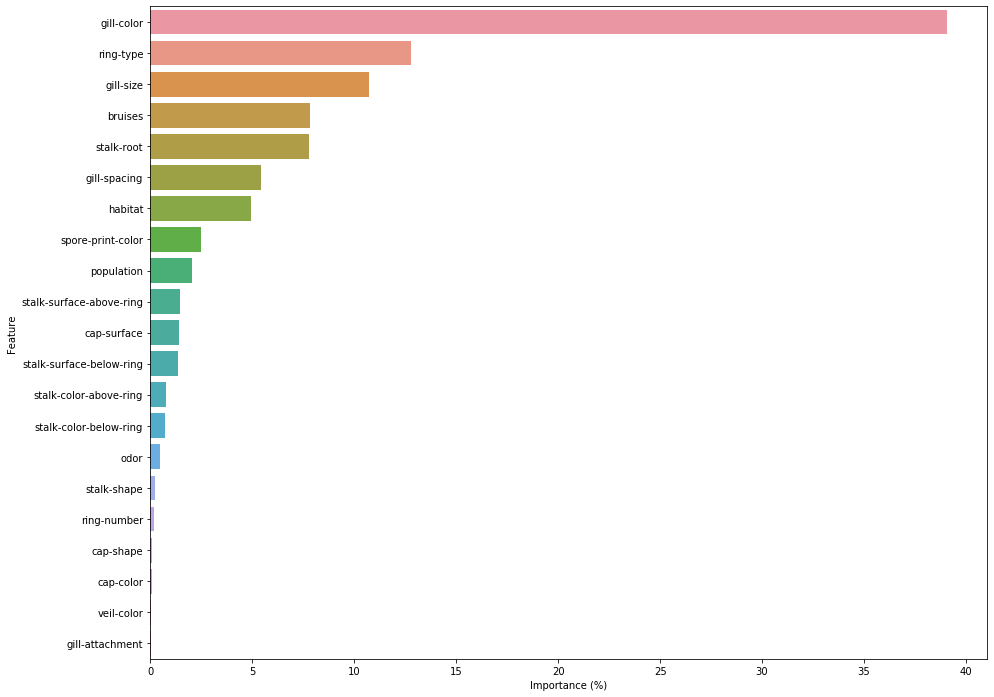

In [18]:
plt.figure(figsize=(15,12))
sns.barplot( 'Importance (%)','Feature',orient='h',data=features_data)
insignificant = features_data.loc[features_data['Importance (%)']<0.005]['Feature'].unique()

## 4) 학습 & 예측

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()
rfc = RandomForestClassifier()
svc = SVC()

In [29]:
accuracy = []
models = [lr,rfc,svc]
for m in models:
    m.fit(X_train,Y_train)
    prediction = m.predict(X_test)
    accuracy.append([m,accuracy_score(Y_test,prediction)])

In [34]:
for model in accuracy:
    print(classification_report(Y_test,model[0].predict(X_test)))
    print("Accuracy of {}:  {}".format(model[0],round(accuracy_score(Y_test,model[0].predict(X_test))*100,2)),'%\n\n')

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1252
           1       0.96      0.95      0.95      1186

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438

Accuracy of LogisticRegression():  95.61 %


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1252
           1       1.00      1.00      1.00      1186

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Accuracy of RandomForestClassifier():  100.0 %


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1252
           1       1.00      1.00      1.00      1186

    accuracy                           1.00      2438
   macro avg       1.00      1.00 